# Parte I-Regresión logistica

In [1]:
from Datos import Datos
import EstrategiaParticionado
from matplotlib import pyplot as plt
from ClasificadorNaiveBayes import ClasificadorNaiveBayes
from ClasificadorKNN import ClasificadorKNN
from ClasificadorRegresionLogistica import ClasificadorRegresionLogistica
import Clasificador
from tabulate import tabulate
import numpy as np

In [2]:
# Cargamos datasets
PARTICIONES=5
dataset_1=Datos('./datasets/heart.csv')
dataset_1.normalizarDatos()
dataset_2=Datos('./datasets/wdbc.csv')
dataset_2.normalizarDatos()

# Cargamos estrategia de particionado
estrategia_1 = EstrategiaParticionado.ValidacionSimple(PARTICIONES, 0.2)
estrategia_2 = EstrategiaParticionado.ValidacionSimple(PARTICIONES, 0.2)

# Cargamos Clasificadores
clasificador = Clasificador.Clasificador()
logisticReg = ClasificadorRegresionLogistica()
logisticRegSK = Clasificador.ClasificadorRegresionLogisticaSKLearn()
naiveBayes = ClasificadorNaiveBayes()
knn = ClasificadorKNN()
clasificadores = [logisticReg,naiveBayes,knn]
nombres = ["Regresion Logistica", "Naive Bayes", "KNN"]

## HEART

In [3]:
errores = clasificador.validacion(estrategia_1, dataset_1, logisticReg, None)
headers = ["Nº particion", "Indice error"]

desviacion_estandar = np.std(errores)
media = sum(errores) / len(errores)
print("Indice de errores por partición:")
table = tabulate(enumerate(errores, 1), headers, tablefmt="grid")
print(table)


Indice de errores por partición:
+----------------+----------------+
|   Nº particion |   Indice error |
+================+================+
|              1 |       0.304348 |
+----------------+----------------+
|              2 |       0.347826 |
+----------------+----------------+
|              3 |       0.217391 |
+----------------+----------------+
|              4 |       0.244565 |
+----------------+----------------+
|              5 |       0.206522 |
+----------------+----------------+


In [4]:
errores = clasificador.validacion(estrategia_1, dataset_1, logisticRegSK, None)
headers = ["Nº particion", "Indice error"]

desviacion_estandar = np.std(errores)
media = sum(errores) / len(errores)
print("Indice de errores por partición:")
table = tabulate(enumerate(errores, 1), headers, tablefmt="grid")
print(table)

Indice de errores por partición:
+----------------+----------------+
|   Nº particion |   Indice error |
+================+================+
|              1 |       0.13587  |
+----------------+----------------+
|              2 |       0.157609 |
+----------------+----------------+
|              3 |       0.119565 |
+----------------+----------------+
|              4 |       0.103261 |
+----------------+----------------+
|              5 |       0.13587  |
+----------------+----------------+


## WDBC

In [5]:
errores = clasificador.validacion(estrategia_2, dataset_2, logisticReg, None)
headers = ["Nº particion", "Indice error"]

desviacion_estandar = np.std(errores)
media = sum(errores) / len(errores)
print("Indice de errores por partición:")
table = tabulate(enumerate(errores, 1), headers, tablefmt="grid")
print(table)

Indice de errores por partición:
+----------------+----------------+
|   Nº particion |   Indice error |
+================+================+
|              1 |      0.0350877 |
+----------------+----------------+
|              2 |      0.0175439 |
+----------------+----------------+
|              3 |      0.0350877 |
+----------------+----------------+
|              4 |      0.0350877 |
+----------------+----------------+
|              5 |      0.0263158 |
+----------------+----------------+


In [6]:
errores = clasificador.validacion(estrategia_2, dataset_2, logisticRegSK, None)
headers = ["Nº particion", "Indice error"]

desviacion_estandar = np.std(errores)
media = sum(errores) / len(errores)
print("Indice de errores por partición:")
table = tabulate(enumerate(errores, 1), headers, tablefmt="grid")
print(table)

Indice de errores por partición:
+----------------+----------------+
|   Nº particion |   Indice error |
+================+================+
|              1 |     0.00877193 |
+----------------+----------------+
|              2 |     0.0175439  |
+----------------+----------------+
|              3 |     0.0263158  |
+----------------+----------------+
|              4 |     0.0175439  |
+----------------+----------------+
|              5 |     0.0175439  |
+----------------+----------------+


# PARTE II - Analisis ROC

### Componentes de la Curva ROC:

    Eje X (tasa de falsos positivos): Representa la tasa de falsos positivos, también conocida como "1 - especificidad". Es la proporción de instancias negativas que fueron incorrectamente clasificadas como positivas.

    Eje Y (tasa de verdaderos positivos): Representa la tasa de verdaderos positivos, también conocida como "sensibilidad" o "tasa de recuperación". Es la proporción de instancias positivas que fueron correctamente clasificadas como positivas.

    Línea Diagonal (línea de aleatoriedad): Representa el rendimiento esperado de un clasificador aleatorio.

### Interpretación de la Curva ROC:

    Posición Ideal: Un clasificador perfecto tendría una tasa de verdaderos positivos de 1 y una tasa de falsos positivos de 0, llevándolo al punto (0,1) en la esquina superior izquierda de la gráfica.

    Área bajo la Curva (AUC-ROC): Cuanto más se acerque el AUC-ROC a 1, mejor será el rendimiento del clasificador. Un AUC-ROC de 0.5 indica un rendimiento similar al azar.

### Interpretación del Rendimiento del Clasificador:

    Si la Curva ROC está por encima de la Línea de Aleatoriedad: El clasificador tiene un mejor rendimiento que el azar.

    AUC-ROC Cercano a 1: Indica un buen rendimiento, ya que el clasificador tiene una alta tasa de verdaderos positivos y una baja tasa de falsos positivos.

    AUC-ROC Cercano a 0.5: Indica un rendimiento similar al azar.

[[263, 420, 96, 141], [344, 465, 51, 60], [331, 457, 59, 73]]
[[0.349009900990099, 0.813953488372093], [0.1485148514851485, 0.9011627906976745], [0.1806930693069307, 0.8856589147286822]]


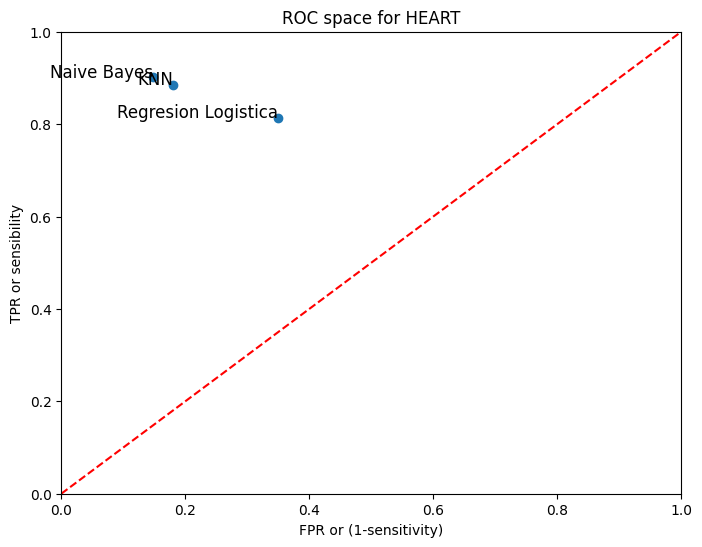

In [10]:
def dibujar_analisis_ROC(dataset, estrategia, dataset_name):
    # TN, TP, FN, FP
    res = clasificador.analisis_ROC(estrategia, dataset, clasificadores, None)
    print(res)

    analisis = []
    for i in range(len(clasificadores)):
        tpr = res[i][1] / (res[i][1] + res[i][2])
        fpr = res[i][3] / (res[i][3] + res[i][0])
        analisis.append([fpr, tpr])
    print(analisis)

    # Gráfica Analisis ROC
    x, y = zip(*analisis)

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y)

    for i, punto in enumerate(analisis):
        plt.text(punto[0], punto[1], f"{nombres[i]}", fontsize=12, ha='right')

    x_tendencia = np.linspace(0, 1, 100)
    y_tendencia = x_tendencia

    plt.plot(x_tendencia, y_tendencia, 'r--', label='Random guess')

    plt.xlabel('FPR or (1-sensitivity)')
    plt.ylabel('TPR or sensibility')
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    plt.title(f'ROC space for {dataset_name}')

    plt.show()

dibujar_analisis_ROC(dataset_1, estrategia_1, "HEART")

#### Como podemos observar en nuestra gráfica, el score de nustros clasificadores para el dataset "hearts" da resultados bastante buenos ya que se aproximan a la cordenada (0,1) de la gráfica.
#### En orden de más a menos optimos para este dataset tenemos Naive Bayes, KNN y Regresión Logística.

[[346, 207, 8, 9], [332, 198, 17, 23], [350, 203, 12, 5]]
[[0.02535211267605634, 0.9627906976744186], [0.0647887323943662, 0.9209302325581395], [0.014084507042253521, 0.9441860465116279]]


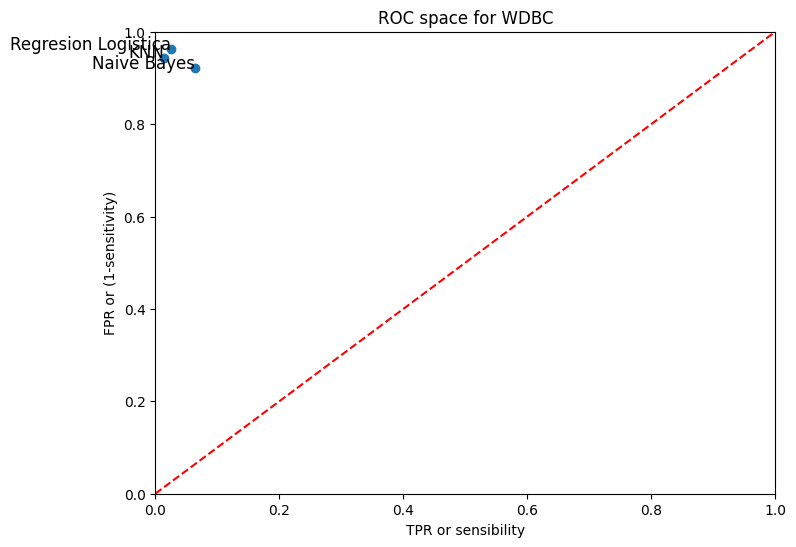

In [8]:
dibujar_analisis_ROC(dataset_2, estrategia_2, "WDBC")

#### Como podemos observar en nuestra gráfica, el score de nustros clasificadores para el dataset "WDBC" da resultados incluso mejores que para "hearts" ya que se aproximan más a la cordenada (0,1) de la gráfica.
#### En orden de más a menos optimos para este dataset tenemos Regresión Logística, KNN y Naive Bayes.

# PARTE III - Curva ROC

![Image Alt Text](http://www.hrc.es/bioest/roc_21.gif)
### Área bajo la curva (AUC):

    La AUC es un valor numérico que cuantifica la capacidad discriminativa del clasificador. AUC varía entre 0 y 1, donde 1 indica un rendimiento perfecto y 0.5 indica un rendimiento similar al azar.
    Podemos calcular la AUC (area under curve) para ver como de eficiente es el algoritmo clasificador para este dataset concreto.

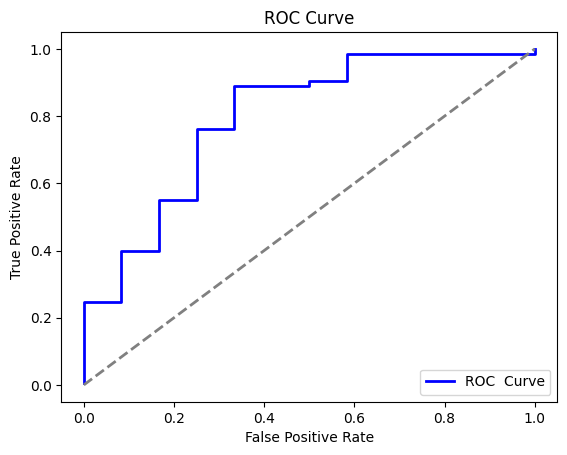

In [24]:
estrategia_3 = EstrategiaParticionado.ValidacionCruzada(PARTICIONES)
tpr, fpr = clasificador.curva_ROC(estrategia_3, dataset_2, logisticReg, None)

tpr = [x/sum(tpr) for x in tpr]
fpr = [x/sum(fpr) for x in fpr]

for i in range(len(tpr)-1):
    tpr[i+1] += tpr[i]
    fpr[i+1] += fpr[i]

# Gráfica de la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC  Curve')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()


In [28]:
auc_score =  np.trapz(tpr, fpr)
print("ROC AUC Score: ", auc_score)

ROC AUC Score:  0.7971380471380484


    Como podemos ver, obtenemos un score casi de 0.8, lo cual es bastante bueno.
